0 0.498654595465 0.515387749076
1000 0.203830774815 0.126613051681
2000 0.202841066132 0.126016478353
3000 0.202771575926 0.126071847935
4000 0.202765713988 0.126099474285
5000 0.202765195544 0.126108478131
6000 0.20276514906 0.126111232111
7000 0.202765144875 0.126112062835
8000 0.202765144498 0.126112312584
9000 0.202765144464 0.126112387605
Final train classification_rate:  0.963087248322
Final test classification_rate:  0.98


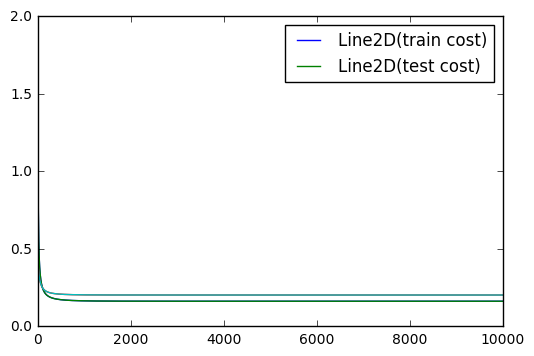

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from process import get_binary_data

X, Y = get_binary_data()
X, Y= shuffle(X,Y)

Xtrain= X[:-100]
Ytrain = Y[:-100]
Xtest = X[-100:] #100 data points will be our validation data
Ytest = Y[-100:] 

D= X.shape[1]
W= np.random.randn(D) #we initialize with random weights
b = 0

def sigmoid(a):
    return 1/(1+ np.exp(-a))

def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

def classification_rate(Y,P):
    return np.mean(Y==P)

#cross entropy function p^T(1-p)^N-T T is our trial nums pY is our probability
def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY) + (1-T)*np.log(1-pY) )

train_costs = []
test_costs = []
learning_rate = 0.001

for i in xrange(10000):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)
    
    ctrain= cross_entropy(Ytrain, pYtrain)
    ctest = cross_entropy(Ytest, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    W-= learning_rate*Xtrain.T.dot(pYtrain- Ytrain)
    b -= learning_rate*(pYtrain- Ytrain).sum()
    
    if i% 1000==0:
        print i, ctrain, ctest
        
print "Final train classification_rate: ", classification_rate(Ytrain, np.round(pYtrain))
print "Final test classification_rate: ", classification_rate(Ytest, np.round(pYtest) )

legend1, = plt.plot(train_costs, label= 'train cost')
legend2, = plt.plot(train_costs, label= 'test cost')
plt.legend([legend1, legend2] )
plt.show()
